## Motivating Example

- Recall from section 40 that there is no closed form solution to the integral below, this expression can only be evaluated numerically
$$
    \int c \cdot e^{-\frac{z^2}{2}} dz
$$

- But we also know from section 40 that a standard Gaussian distribution follows the form

$$
    \int_{-\inf}^{\inf} \frac{1}{\sqrt{2\pi}} e^{-0.5 \cdot (\frac{x-\mu}{\sigma})^2} = 1
$$

- How can be be sure that $c = \frac{1}{\sqrt{2\pi}}$ for the integral to be 1? Even if we evaluate it numerically, we can only get a float value, not a precise fraction!

- Turns out, the value for $c$ pops out once you look at the joint distribution!

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Theory

- Let's start with the definition of the marginal distribution

- **Definition 42.1 (Marginal Distribution )**: Suppose we have the joint PDF $f(x,y)$ of 2 continuous variables X and Y. The marginal PDF of X is simply the PDF of X. 
- If all you have is the joint distribution of X and Y f(x,y), then the marginal PDF of X is simply the integration of the joint distribution across all values of Y
- I find it easiest to imagine this as a joint plot below. The marginal PDF of X is simply the histogram at the top, and the marginal PDF of Y is simply the histogram at the side
- If you are still struggling with this, look at example in section 19. The marginal PDF of X is simply the sum of the probabilities of all discrete X outcomes across all values of Y
- Mathematically:
$$ f_X(x) = f(x) = \int_{y=-\inf}^{\inf} f(x,y) dy


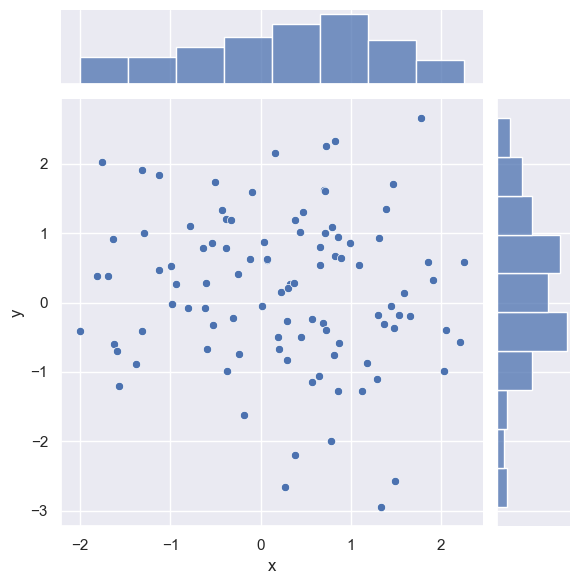

In [15]:
xvals=np.random.normal(0,1, size=100)
yvals=np.random.normal(0,1, size=100)
data=pd.DataFrame({'x': xvals, 'y': yvals})

sns.jointplot(data, x='x', y='y')

- **Theorem 42.1 (Joint distribution of Independent random variables)**: Let's start from the definition of a joint distribution. We know that joint distribution $f(x,y) = P(X = x) \cdot P(Y = y | X = x)$. However, if X and Y are independent, $P(Y = y | X = x) = P(Y = y)$. This gives us the result below
$$ f(x,y) = P(X=y) \cdot P(y=y) = f_X(x) \cdot f_Y(y) $$

- This is usually used to construct the joint PDF, then you just apply the usual integration approach to find the probabilities

#### Example 42.1 (Symmetry of Continuous Random Variables)

- The lifetimes of two lightbulbs, X and Y, are independent $\text{Exponential}(\lambda)$ random variables. What is the probability the second lightbulb lasts longer than the first, $P(Y \gt X)$?

$$\begin{align}
    \text{Let joint PDF be} \\
    f(x,y) &= \lambda e^{-\lambda x} \cdot \lambda e^{-\lambda y} \\
    &= \lambda^2 e^{-\lambda (x+y)} \\ \\

    \text{To find P(Y > X)} \\
    \int_{x=0}^{\inf} \int_{y=x}^{\inf} \lambda^2 e^{-\lambda (x+y)} dy dx &= \int_{x=0}^{\inf} [-\frac{1}{\lambda} \cdot \lambda^2 e^{-\lambda(x+y)}]^{\inf}_{x} dx \\
    &= \int_{x=0}^{\inf} \lambda e^{-2 \lambda x} dx \\
    &= [-\frac{1}{2 \lambda} \lambda e^{-2 \lambda x}]^{\inf}_{0} \\
    &= [-\frac{1}{2} e^{-2 \lambda x}]^{\inf}_{0} \\
    &= 0.5
\end{align}$$

- Basically, there is an equal chance of the X < Y and Y > X. Which is intuitive, since these are identical bulbs. In fact, this argument is true for all joint PDFs of IID variables!

#### Example 42.2 (Gaussian Integral)

- Recall that the PDF of standard normal variable $Z$ is $f(Z) = c \cdot e^{-\frac{z^2}{2}}$
- For this to be a proper PDF, we need $f(Z) = 1$

- Let's imagine we have X and Y that are both independent standard normal. The volume of the joint PDF $f(X,Y) = 1$ by definition

$$\begin{align}
    1 &= \int_{x=-\inf}^{\inf} \int_{y=-\inf}^{\inf} c e^{-\frac{x^2}{2}} \cdot c e^{-\frac{y^2}{2}} dy dx\\
    &= \int_{x=-\inf}^{\inf} \int_{y=-\inf}^{\inf} c^2 e^{-\frac{x^2 + y^2}{2}} dy dx & \text{Converting to polar coordinates...} \\
    &= \int_{0}^{2\pi} \int_{0}^{\inf} c^2 e^{-U} r dr d\Theta & \text{Let } U = \frac{r^2}{2}, \frac{dU}{dr} = r \rightarrow r dr = dU\\
    &= c^2 \int_{0}^{2\pi} \int_{0}^{\inf} e^{-U} dU d\Theta \\
    &= c^2 \int_{0}^{2\pi} [- e^{-U}]^{\inf}_0 d\Theta \\
    &= c^2 \int_{0}^{2\pi} 1 d\Theta \\
    &= c^2 [\Theta]^{2\pi}_0 \\
    &= c^2 2\pi \\ \\

    \text{Simplifying...} \\
    c^2 2\pi &= 1 \\
    c^2 &= \frac{1}{2\pi} \\
    c &= \frac{1}{\sqrt{2\pi}}
\end{align}$$